##### Grading Feedback Cell

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Vidushi Mishra <vmishr01@syr.edu>
- Faculty Assistant: Pranav Kottoli Radhakrishna <pkottoli@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include descriptinve title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need.
- If you perform databricks specific operations, you MUST protect those operations in an if statement by calling the is_databricks() function provided in all homework assignments.  For example, if you use dbutils (databricks utilities), only run dbutils commands if is_databricks() returns true.  Runtime errors created in the grading environment by not protecting databricks specific commands in an if statement will result in a runtime error points deduction. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  Oftentimes there is a large disparity between the level of effort between students who are trying learn, and students who are trying to do the minimum possible to check off an assignment requirement.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who did put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Unless code is provided which reads data files, __you must use the get_training_filename function povided below to read data files."  Runtime errors encountered while grading caused by students not using get_training_filename will result in a minimum of half points off for the problem in question.__

In [2]:
# remember to remove this cell
!pip install pyspark
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/homework-4-ValanZRW-master')
!ls


     |████████████████████████████████| 204.2MB 71kB/s 
     |████████████████████████████████| 204kB 45.3MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=558884fed3f5eb595662d90200f7e984c00aaeac07324f2e32813a1cbf4f4c2e
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
Mounted at /content/drive
'IST-718 Fall 2020 Homework 4.ipynb'   tweets.csv


In [3]:
# Do not delete or change this cell

enable_grid = True

# grading import statements
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

# Sentiment Analysis
In this assignment, you will use the tweets.csv file to perform sentiment analysis. The tweets.csv file contains the following columns:
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

# Qustion 1: (10 pts)
Read tweets.csv into a spark dataframe named `tweets_df`.  Solutions that do not use `get_training_filename` will be heavily penalized.  Drop all columns except target and text.  Transform the target column such that a negative sentiment is equal to 0 and a positive sentiment is equal to 1.  Determine and print the percentage of positive and negative tweets in the dataframe such that it's easy for the graders to find and interpret your data.

In [80]:
# your code here
from pyspark.sql import functions as F

file_name = get_training_filename("tweets.csv")
tweets_df = spark.read.csv(file_name, header=True, inferSchema=True)
tweets_df = tweets_df.select("target", "text")

update_func = (F.when(F.col('target')>0, 1)
                .otherwise(0))
tweets_df = tweets_df.withColumn('target', update_func)

tweets_df.groupBy('target').agg(F.count('*')).show()

+------+--------+
|target|count(1)|
+------+--------+
|     1|   50000|
|     0|   50000|
+------+--------+



In [81]:
# grading cell do not modify
tweets_pd = tweets_df.toPandas()
display(tweets_pd.head())
print(tweets_pd.shape)

,target,text
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone


(100000, 2)


##### Grading Feedback Cell

# Question 2: (10 pts)
Pre-process the data by creating a pipeline named `tweets_pre_proc_pipe`. Your pipeline should tokenize, remove stop words, and do a TF-IDF transformation.  Fit and execute your pipeline, and create a new dataframe named `tweets_pre_proc_df`.  Print the shape of the resulting TF-IDF data such that it's easy for the graders to find and understand as num rows x num words. Based on the shape of the TF-IDF data, would you expect a logistic regression model to overfit?

In [82]:
# your code here
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import IDF
from pyspark.ml.feature import CountVectorizer

import requests
stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

tokenize = RegexTokenizer().setGaps(False)\
  .setPattern("\\p{L}+")\
  .setInputCol("text")\
  .setOutputCol("words")
remove_stop_words = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(True)\
  .setInputCol("words")\
  .setOutputCol("filtered")
cv = CountVectorizer(minTF=1., minDF=5., vocabSize=2**17)\
  .setInputCol("filtered")\
  .setOutputCol("tf")
idf = IDF()\
  .setInputCol('tf')\
  .setOutputCol('tfidf')

tweets_pre_proc_pipe = Pipeline(stages = [tokenize, remove_stop_words, cv, idf]).fit(tweets_df)
tweets_pre_proc_df = tweets_pre_proc_pipe.transform(tweets_df)

print("num rows: ", 100000)
print("num words: ", len(tweets_pre_proc_pipe.stages[-2].vocabulary))

num rows:  100000
num words:  11099


In [83]:
# grading cell do not modify
display(tweets_pre_proc_df.toPandas().head())

,target,text,words,filtered,tf,tfidf
0,1,I LOVE @Health4UandPets u guys r the best!!,"[i, love, health, uandpets, u, guys, r, the, b...","[love, health, uandpets, u, guys, r, best]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,im meeting up with one of my besties tonight! ...,"[im, meeting, up, with, one, of, my, besties, ...","[im, meeting, besties, tonight, wait, girl, talk]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S...","[darealsunisakim, thanks, for, the, twitter, a...","[darealsunisakim, thanks, twitter, add, sunisa...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,Being sick can be really cheap when it hurts t...,"[being, sick, can, be, really, cheap, when, it...","[sick, really, cheap, hurts, eat, real, food, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn, he, has, that, effect, on, eve...","[lovesbrooklyn, effect]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Your explanation here: 

##### Grading Feedback Cell

# Question 3: (10 pts)
Since IDF considers a word's frequency across all documents in a corpus, you can use IDF as a form of inference.  Examine the documentation for the spark ML object that you used to create TF-IDF scores and learn how to extract the IDF scores for words in the corpus.  Create a pandas dataframe containing the 5 most important IDF scores named `most_imp_idf`.  Create another pandas dataframe containing the 5 least important IDF scores named `least_imp_idf`.  Each dataframe shall have 2 columns named `word` and `idf_score`.  Explain in words your interpretation of what the IDF scores mean.

In [ ]:
# your code here
import pandas as pd

tfidf_pd = pd.DataFrame({'word': tweets_pre_proc_pipe.stages[-2].vocabulary, 'tfidf': tweets_pre_proc_pipe.stages[-1].idf.toArray()})
most_imp_idf = tfidf_pd.sort_values('tfidf').head(5)
least_imp_idf = tfidf_pd.sort_values('score', ascending=False).head(5)

In [44]:
# grading cell do not modify
display(most_imp_idf)
display(least_imp_idf)

,word,tfidf
1,t,2.232416
0,s,2.247728
2,m,2.549391
3,just,2.568907
4,good,2.873348


,word,tfidf
11098,freezes,9.721176
10045,uf,9.721176
10047,closes,9.721176
10048,sangria,9.721176
10049,jensen,9.721176


Your explanation here: 

##### Grading Feedback Cell

# Question 4: (10 pts)
Create a new recursive pipeline named `lr_pipe` which starts with `tweets_pre_proc_pipe` and adds a logistic regression model using default hyper parameters.  Fit lr_pipe using `tweets_df`.  Score the model using ROC AUC.  Report the resulting AUC such that it is easy for graders to find and interpret.

In [59]:
# your code here
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

training_df, validation_df, testing_df = tweets_df.randomSplit([0.6, 0.3, 0.1], seed=0)

lr = LogisticRegression().\
    setLabelCol('target').\
    setFeaturesCol('tfidf').\
    setRegParam(0.0).\
    setMaxIter(100).\
    setElasticNetParam(0.)

lr_pipe = Pipeline(stages=[tweets_pre_proc_pipe, lr])

evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='target', metricName='areaUnderROC')
auc = evaluator.evaluate(lr_pipe.fit(training_df).transform(validation_df))
print("AUC", auc)

AUC 0.7170722128246855


##### Grading Feedback Cell

# Question 5: (10 pts)
Create 2 pandas dataframes named `lr_pipe_df_neg` and `lr_pipe_df_pos`which contain 2 colunms: `word` and `score`.  Load the 2 dataframes with the top 10 words and logistic regression coefficients that contribute the most to negative and positive sentiments respectively. Analyze the 2 dataframes and describe if the words make sense.  Do the words look like they are really negative and positive?

In [45]:
# your code here
import pandas as pd
vocabulary = tweets_pre_proc_pipe.stages[-2].vocabulary
weights = lr_pipe.fit(training_df)stages[-1].coefficients.toArray()

coeffs_df = pd.DataFrame({'word': vocabulary, 'score': weights})

lr_pipe_df_pos = coeffs_df.sort_values('score').head(10)
lr_pipe_df_neg = coeffs_df.sort_values('score', ascending=False).head(10)

num weights: 11099
num rows: 29907


In [46]:
# grading cell - do not modify
display(lr_pipe_df_neg)
display(lr_pipe_df_pos)

,word,score
7738,essential,8.162442
10099,gratitude,5.667098
10309,tau,5.589913
9393,monte,5.191918
8318,instantly,4.659742


,word,score
7030,quï,-5.783827
9506,sheamus,-5.425048
10453,chunk,-5.361132
2596,sebby,-4.701627
9875,herb,-4.624088


Your explanation here:

##### Grading Feedback Cell

# Question 6a: (5 pts)
The goal of this question is to try to improve the score from question 4 using a regularization grid search on a new pipeline named `lr_pipe_1`. lr_pipe_1 is the same as lr_pipe above but we would like you to create a new pipe for grading purposes only.  I'm not sure if it's possible to increase the score or not.  You will be graded on level of effort to increase the score in relation to other students in the class.  All of your grid search code should be inside the `if enable_grid` statement in the cell below.  The enable_grid boolean is set to true in a grading cell above.  If any of the grid search code executes outside of the if statement, you will not get full credit for the question.  We want the ability to turn off the grid search during grading.<br>

In [60]:
# your grid search (and only your grid search) code here
if enable_grid:
  # your grid search code here

  from pyspark.ml.tuning import ParamGridBuilder
  
  lr_pipe_1 = lr_pipe
  grid = ParamGridBuilder().\
      addGrid(lr.regParam, [0., 0.01, 0.02]).\
      addGrid(lr.elasticNetParam, [0., 0.2, 0.4]).\
      build()
  
  all_models = []
  for j in range(len(grid)):
    print("Fitting model {}".format(j+1))
    model = lr_pipe_1.fit(training_df, grid[j])
    all_models.append(model)

  import numpy as np

  accuracies = [m.\
    transform(validation_df).\
    select(F.avg(F.expr('float(target = prediction)')).alias('accuracy')).\
    first().\
    accuracy for m in all_models]

  best_model_idx = np.argmax(accuracies)
  best_model = all_models[best_model_idx]
  print("Best accuracy: ", accuracies[best_model_idx])
  print("Best grid: ", grid[best_model_idx])
  pass

Fitting model 1
Fitting model 2
Fitting model 3
Fitting model 4
Fitting model 5
Fitting model 6
Fitting model 7
Fitting model 8
Fitting model 9


##### Grading feedback cell

# Question 6b (5 pts)
Build a new pipeline named `lr_pipe_2` which uses the optimized model parameters from the grid search in question 6a above (the best model).  Create 2 variables named alpha and lambda and assign to them the best alpha and lambda produced by the grid search by hard coding the values. Fit and transform lr_pipe_2.  Compare AUC scores between lr_pipe_2 with lr_pipe in question 4.  Create a pandas dataframe named `comapre_1_df` which encapsulates the comparison data.  comapre_1_df Shall have 2 columns: `model_name` and `auc_score`.

In [74]:
# your optimized model code here
# example
# alpha = 0.1
# lambda = 0.1

lambda_par = 0.01
alpha_par = 0.2

# lr_pipe_2 code here

lr_2 = LogisticRegression().\
      setLabelCol('target').\
      setFeaturesCol('tfidf').\
      setRegParam(lambda_par).\
      setMaxIter(100).\
      setElasticNetParam(alpha_par)

lr_pipe_2 = Pipeline(stages=[tweets_pre_proc_pipe, lr_2])

evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='target', metricName='areaUnderROC')
auc_2 = evaluator.evaluate(lr_pipe_2.fit(training_df).transform(validation_df))

model_name = ["LogisticRegression", "LogisticRegression_2"]
auc_score = [auc, auc_2]
comapre_1_df = pd.DataFrame({"model_name" : model_name, "auc_score": auc_score})


In [75]:
# grading cell - do not modify
display(comapre_1_df)

,model_name,auc_score
0,LogisticRegression,0.717072
1,LogisticRegression_2,0.751222


##### Grading Feedback Cell

# Question 7 (10 pts)
Perform inference on lr_pipe_2.  Write code to report how many words were eliminated from the best model in question 6b above (if any) as compared to the model in question 4 above.  Make sure your output is easy for the graders to find and interpret.

In [78]:
# your code here
vocabulary_1 = tweets_pre_proc_pipe.stages[-2].vocabulary
print("words eliminated: ", len(vocabulary_1)-len(vocabulary))

words eliminated:  0


##### Grading Feedback Cell

# Question 8 (10 pts)
Perform the same inference analysis that you did in question 5 but name the data frames `lr_pipe_df_neg_1` and `lr_pipe_df_pos_1`.  Compare the word importance results with the results in question 5.

In [85]:
# your code here
weights_1 = lr_pipe_2.fit(training_df).stages[-1].coefficients.toArray()
coeffs_df_1 = pd.DataFrame({'word': vocabulary_1, 'score': weights_1})

lr_pipe_df_pos_1 = coeffs_df_1.sort_values('score').head(10)
lr_pipe_df_neg_1 = coeffs_df_1.sort_values('score', ascending=False).head(10)

In [86]:
# grading cell - do not modify
display(lr_pipe_df_neg_1)
display(lr_pipe_df_pos_1)

,word,score
29,thanks,0.334878
195,welcome,0.328552
82,thank,0.321742
10258,bruno,0.298440
6507,wiff,0.262468
3552,peaceful,0.262105
4,good,0.247950
52,happy,0.241649
8929,pies,0.238944
131,glad,0.238238


,word,score
50,sad,-0.544162
80,sick,-0.365258
203,missing,-0.358596
242,hurts,-0.356169
208,poor,-0.350076
39,miss,-0.349115
42,wish,-0.344449
640,sadly,-0.343648
509,lonely,-0.320394
177,sucks,-0.315980


##### Grading Feedback Cell

Your explanation here:

##### Grading Feedback Cell

# Question 9 (10 pts)
Create a receiver operating characteristic (ROC) plot for the best model in question 6.  Briefly describe in words the high level steps needed to build a ROC curve as outlined in lecture.  Convince me you understand the high level steps needed to make a ROC curve.

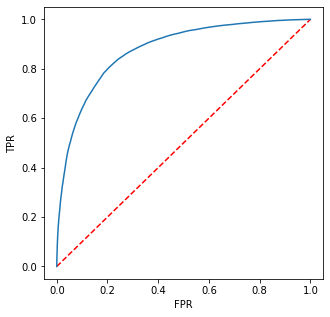

In [90]:
# your code here
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(best_model.stages[-1].summary.roc.select('FPR').collect(),
         best_model.stages[-1].summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


Your explanation here:

##### Grading Feedback Cell

# Question 10 (10 pts)
Learn about [precision/recall](https://en.wikipedia.org/wiki/Precision_and_recall) curves. Using the logistic regression summary object contained in the linear regression object within lr_pipe_2, create a precision recall plot. Similar to the `roc` object which is available in the logistic regression summary, there is a `pr` object which can be used to help create a precision / recall curve.  Note that the precision recall curve is built using the same high level methodology as the ROC curve, but using different metrics calculated from the confusion matrix.  If you understand how a ROC curve is built, you understand how a precision / recall curve is built.  Compare and contrast the differences between precision / recall and ROC curves.  What axis is common and what axis is different between the 2 curves?

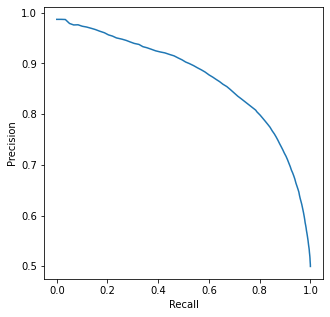

In [96]:
# your code here
plt.figure(figsize=(5,5))
plt.plot(best_model.stages[-1].summary.pr.select('recall').collect(),
         best_model.stages[-1].summary.pr.select('precision').collect())
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [93]:
best_model.stages[-1].summary.pr.select('precision').collect()

[Row(precision=0.9867172675521821),
 Row(precision=0.9867172675521821),
 Row(precision=0.9864077669902913),
 Row(precision=0.9786269430051814),
 Row(precision=0.97568093385214),
 Row(precision=0.9759969028261711),
 Row(precision=0.9731738849385908),
 Row(precision=0.9716097023153253),
 Row(precision=0.9690014197823),
 Row(precision=0.9666103127641589),
 Row(precision=0.9635704749189395),
 Row(precision=0.9603201634877384),
 Row(precision=0.9561074664167448),
 Row(precision=0.9537304800462695),
 Row(precision=0.9501750605978992),
 Row(precision=0.9476787030213707),
 Row(precision=0.9452891038931122),
 Row(precision=0.9423076923076923),
 Row(precision=0.9393131727319324),
 Row(precision=0.9372892784895482),
 Row(precision=0.9328453796889296),
 Row(precision=0.9307967536434244),
 Row(precision=0.9280479680213192),
 Row(precision=0.9246878457404774),
 Row(precision=0.9224514380364403),
 Row(precision=0.920604099244876),
 Row(precision=0.9171278267404522),
 Row(precision=0.9147940691927512)

Your explanation here:

##### Grading Feedback Cell